In [1]:
import tensorflow
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from keras.utils import plot_model
import matplotlib.pyplot as plt

"""
This notebook is based on using machine learning on a set of data taken from a study on Abalones. 
"""

Using TensorFlow backend.


'\nThis notebook is based on using machine learning on a set of data taken from a study on Abalones. \n'

In [2]:
"""
import data set, separate into training & testing data
"""

filepath = "abalone.data"
data = pd.read_csv (filepath, header=None, names=['sex','length', 'diameter',
                                                        'height','whole','shucked',
                                                        'viscera','shell','rings'])

  # add 3 one-hot-encoded columns, the sex column is labeled "M, F, I", so add a column that does 1 & 0
data = pd.concat([pd.get_dummies(data['sex'], prefix='sex'), data], axis=1)  
del data['sex']  # remove column with values of "M, F, I"

In [3]:
"""
The following both creates the 3-column one-hot encoded sex input data
and concatenates it (onto the front end) of the rest of the data array 
"""

  # first take a random 90% of the data, use it as our training data
train_data = data.sample(frac = 9/10, axis = 0)

  # take everything else to be our testing data
test_data = data.drop(train_data.index)

"""
train_in will be the input data we use to train our network
train_out will be used as the answer key for the training done on train_in
"""
train_out = train_data['rings'].values  
del train_data['rings']
train_in = train_data.values

""" 
test_in will be the input parameters for seeing if our network works
test_out will be the answer key for test_in
"""
test_out = test_data['rings'].values
del test_data ['rings']
test_in = test_data.values

  # clean up and delete unused arrays
del train_data
del test_data

print(train_in.shape)

(3759, 10)


In [4]:
""" 
fucking around with "30 seconds to Keras"
"""

  # initialize a linear network structure
model = Sequential()

  # add some layers
model.add(Dense(units=128, activation='relu', input_dim=10))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='relu'))


  # configure learning process
model.compile(loss='mean_absolute_error',
              optimizer='Adam',
              metrics=['mean_absolute_error'])

  # train model for a few epochs. x is the input, y is the target (TRAINING) data
history = model.fit(x=train_in, y=train_out, epochs=50, verbose=2)

Epoch 1/50
 - 0s - loss: 6.2757 - mean_absolute_error: 6.2757
Epoch 2/50
 - 0s - loss: 3.6385 - mean_absolute_error: 3.6385
Epoch 3/50
 - 0s - loss: 3.1460 - mean_absolute_error: 3.1460
Epoch 4/50
 - 0s - loss: 2.9186 - mean_absolute_error: 2.9186
Epoch 5/50
 - 0s - loss: 2.6722 - mean_absolute_error: 2.6722
Epoch 6/50
 - 0s - loss: 2.5235 - mean_absolute_error: 2.5235
Epoch 7/50
 - 0s - loss: 2.4521 - mean_absolute_error: 2.4521
Epoch 8/50
 - 0s - loss: 2.3076 - mean_absolute_error: 2.3076
Epoch 9/50
 - 0s - loss: 2.2252 - mean_absolute_error: 2.2252
Epoch 10/50
 - 0s - loss: 2.1935 - mean_absolute_error: 2.1935
Epoch 11/50
 - 0s - loss: 2.0995 - mean_absolute_error: 2.0995
Epoch 12/50
 - 0s - loss: 2.0513 - mean_absolute_error: 2.0513
Epoch 13/50
 - 0s - loss: 2.0239 - mean_absolute_error: 2.0239
Epoch 14/50
 - 0s - loss: 1.9841 - mean_absolute_error: 1.9841
Epoch 15/50
 - 0s - loss: 1.9372 - mean_absolute_error: 1.9372
Epoch 16/50
 - 0s - loss: 1.9045 - mean_absolute_error: 1.9045
E

418/418 [==============================] - 0s 92us/step
[4.187162248711837, 4.187161922454834]
['loss', 'mean_absolute_error']


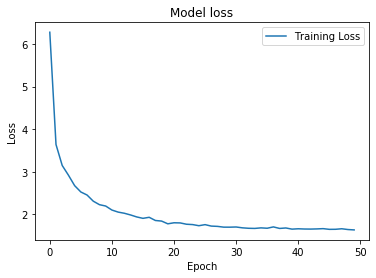

In [5]:
# evaluate performance, x is input and y is target (TESTING) data
    
loss_and_metrics = model.evaluate(x=test_in, y=test_out, verbose=1)

print(loss_and_metrics)
print(model.metrics_names)

#plot_model(model)

# Plot training & validation loss values
plt.plot(history.history['loss'], label="Training Loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [6]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error'])
